In [1]:
!pip install scikit -learn


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: -l


In [2]:
!pip install statsmodels

In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
warnings.filterwarnings('ignore')

import scipy.stats as stats
import os

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Objective: Predict claim amount by customers of an auto insurance company based on customer features

In [4]:
data = pd.read_csv("marketing_customer_analysis.csv")

In [5]:
data.columns = [col.lower().replace(" ","_") for col in data.columns]

In [6]:
data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


# EDA/ Cleaning/ Wragling

In [7]:
data.isna().sum() #check for NaNs

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [8]:
data['income'].value_counts()

0        2317
95697      12
27972       7
25370       7
61108       7
         ... 
36529       1
25859       1
38179       1
70190       1
21941       1
Name: income, Length: 5694, dtype: int64

In [9]:
for column in data.columns:
    print(data[column].value_counts())

BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: customer, Length: 9134, dtype: int64
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64
7200.664877     6
17497.522010    6
2248.449633     6
8092.876960     6
6057.072080     6
               ..
9162.063169     1
2374.147419     1
6874.848270     1
9934.865795     1
2611.836866     1
Name: customer_lifetime_value, Length: 8041, dtype: int64
No     7826
Yes    1308
Name: response, dtype: int64
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64
1/10/11    195
1/27/11    194
2/14/11    186
1/26/11    181
1/17/11    180
1/19/11    179
1/31/11    178
1/3/11     178
1/20/11  

In [10]:
numericals = data.select_dtypes('number')
numericals

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [11]:
num = data.select_dtypes([np.number])
num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [12]:
categoricals =data.select_dtypes('object')
categoricals

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


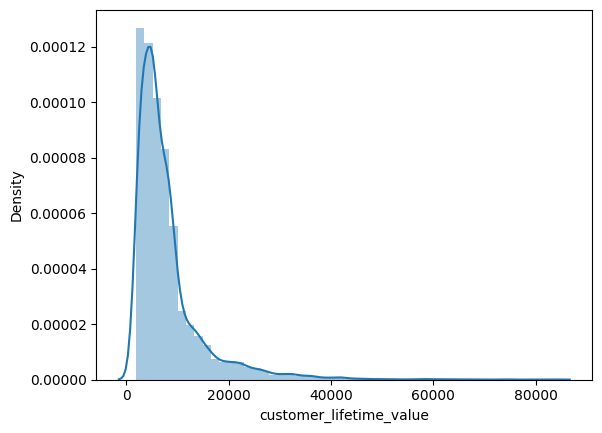

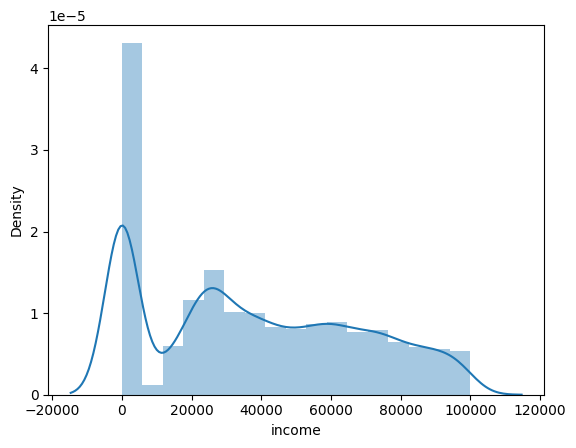

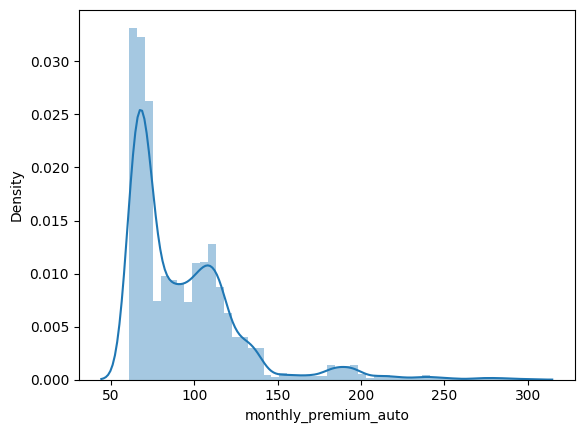

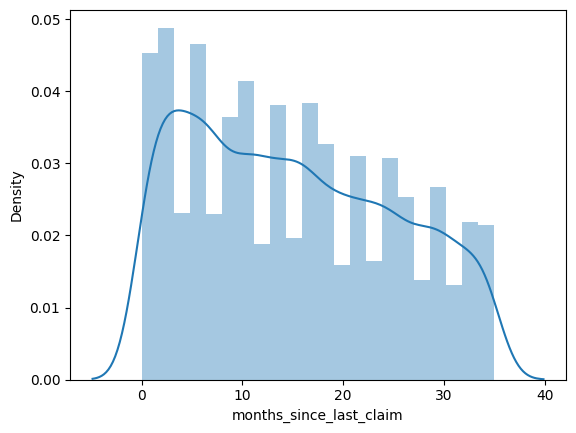

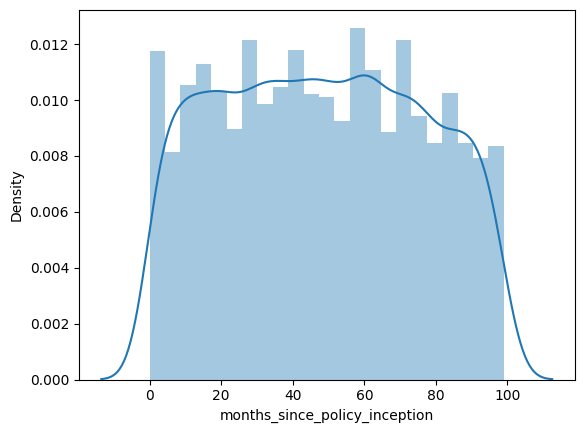

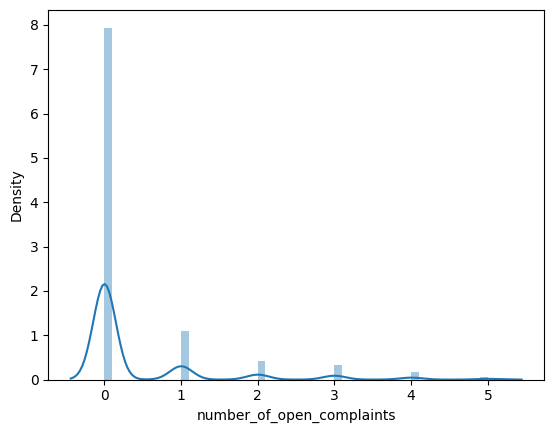

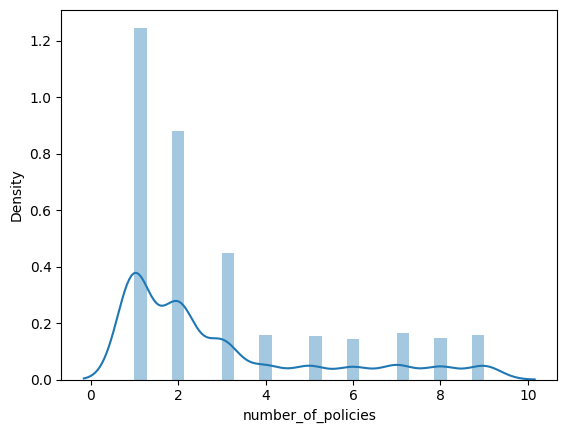

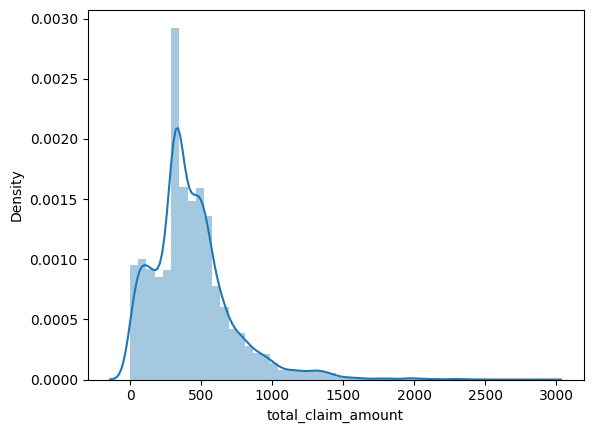

In [13]:
#EDA: Numericals distribution
for i in data.select_dtypes('number').columns:
    sns.distplot(data[i])
    plt.show()

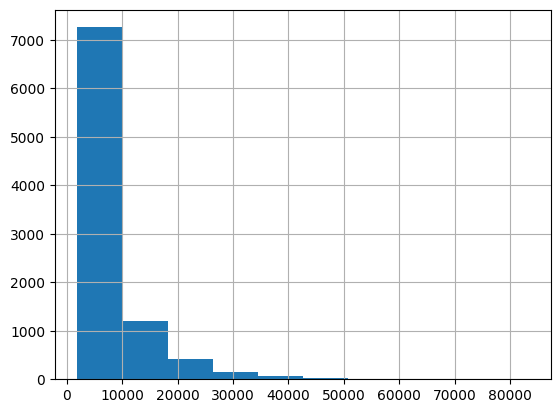

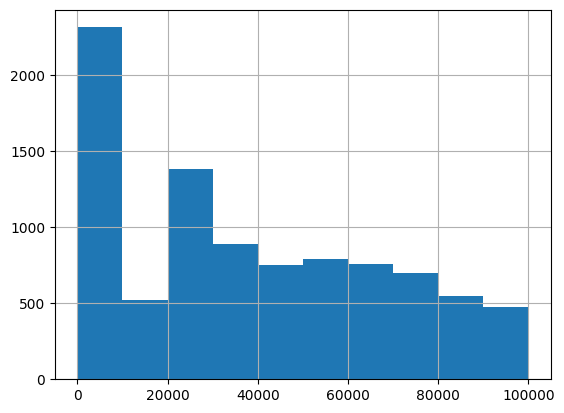

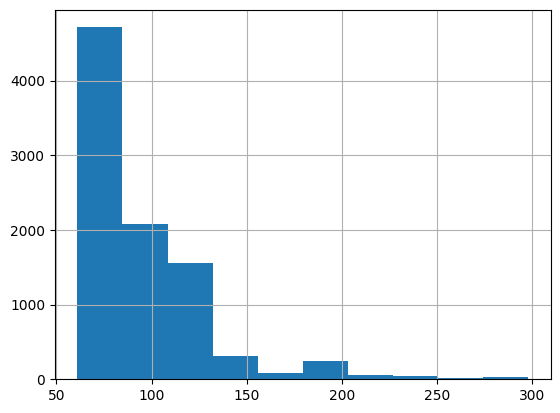

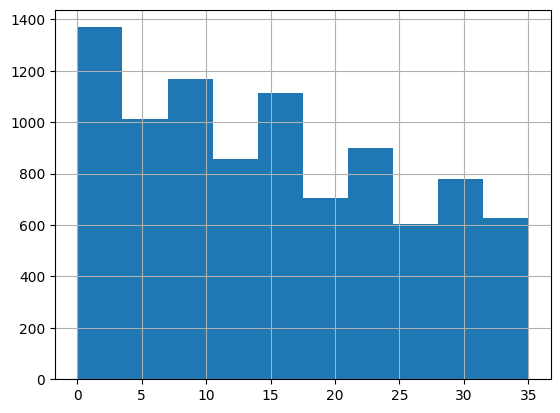

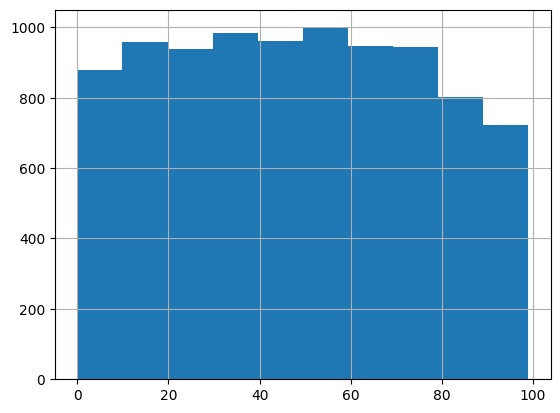

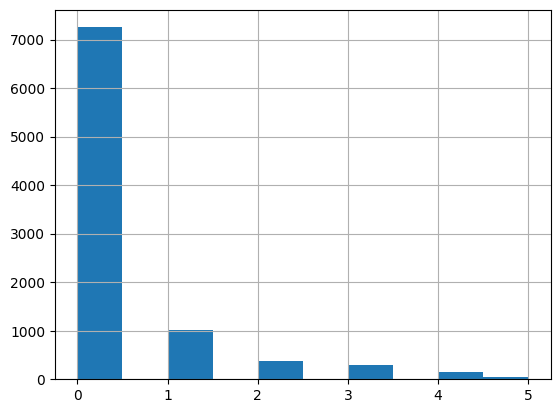

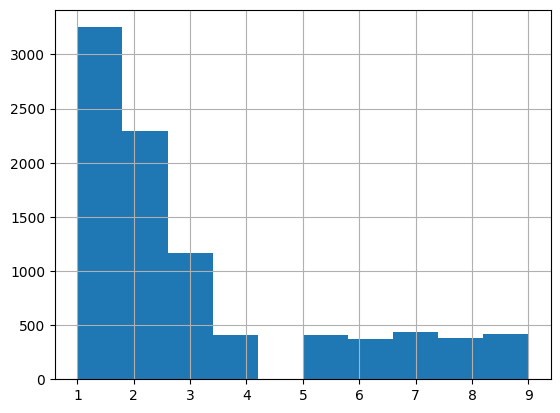

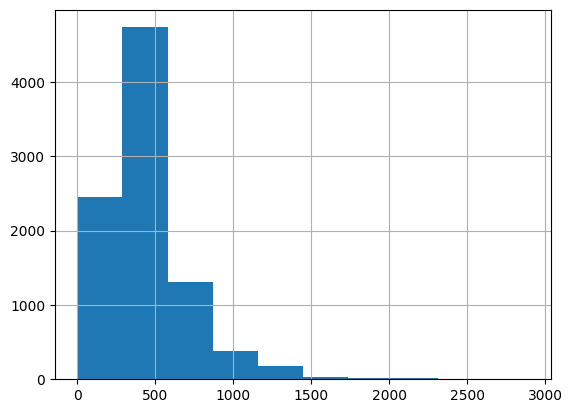

In [14]:
#EDA: Numericals histogram
for i in data.select_dtypes('number').columns:
    data[i].hist()
    plt.show()

In [15]:
#XY split, run OLS
X = numericals.drop(['total_claim_amount'], axis=1) 
y = numericals['total_claim_amount']


X = sm.add_constant(X)

model = sm.OLS(y,X).fit() 

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     1405.
Date:                Sun, 19 Mar 2023   Prob (F-statistic):               0.00
Time:                        13:10:06   Log-Likelihood:                -61425.
No. Observations:                9134   AIC:                         1.229e+05
Df Residuals:                    9126   BIC:                         1.229e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [16]:
#fit linear regression
X = numericals.drop(['total_claim_amount'], axis=1) 
y = numericals['total_claim_amount'] 

lm = LinearRegression()
lm.fit(X,y) 


LinearRegression()

# Predicting benchmark model

In [17]:

predictions = lm.predict(X) 

rmse = mean_squared_error(y, predictions, squared=False) 
mae = mean_absolute_error(y, predictions)

print("R2_score:", round(lm.score(X,y),2)) 
print("RMSE:", rmse)
print("MAE:", mae)

R2_score: 0.52
RMSE: 201.53347925902824
MAE: 144.382900742772


In [18]:
X.corr() #dont see strong correlation between variables indicating no multicollinarity

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000


In [19]:
corr_data = data.select_dtypes([np.number])
correlations_matrix = corr_data.corr()  
correlations_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


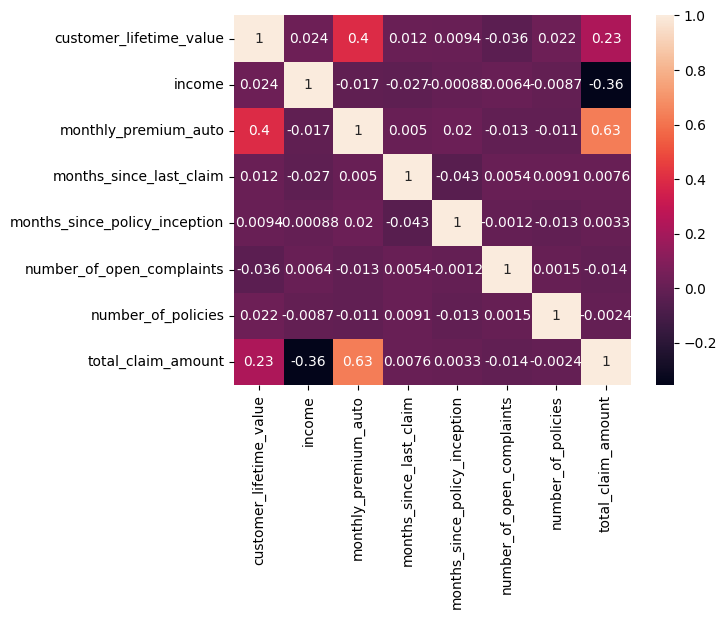

In [20]:
sns_plot = sns.heatmap(correlations_matrix, annot=True)
figure = sns_plot.get_figure()    
figure.savefig('svm_conf.png', dpi=400)
plt.show()
# no strong correlation (higher than 0.9) between features/attributes

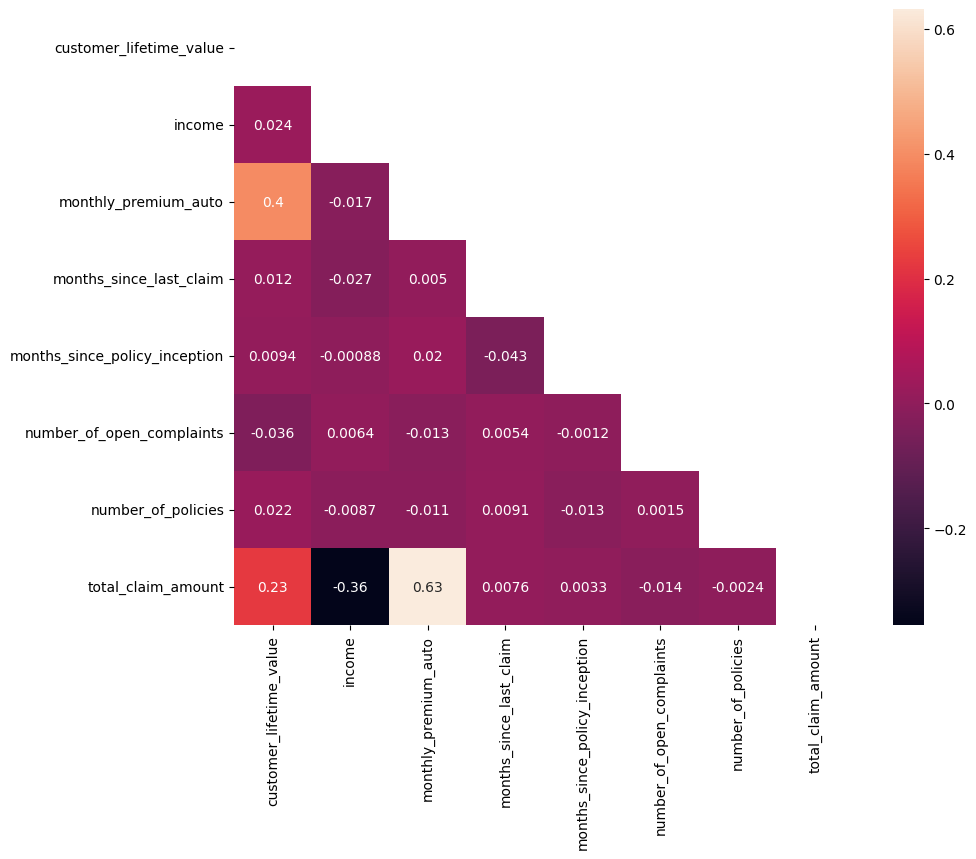

In [21]:
mask = np.zeros_like(correlations_matrix)

mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()
# no strong correlation (higher than 0.9) between features/attributes

In [22]:
data1 = data.copy()

In [23]:
#log transformation
def log_lmbda(x):
    return np.log(x) if np.isfinite(np.log(x)) else np.NAN

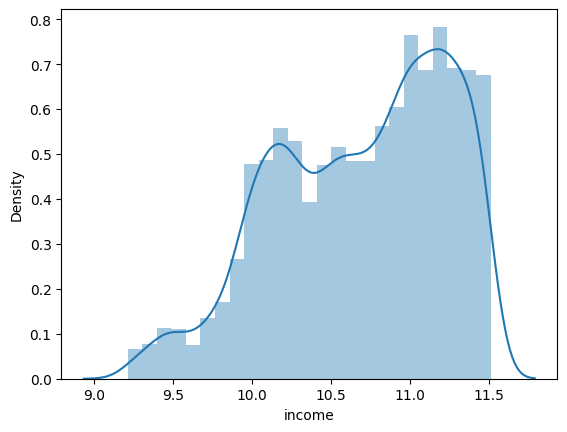

In [24]:
data1['income'] = data1['income'].apply(log_lmbda)

data1['income'] = data1['income'].fillna(np.median(data1['income']))

sns.distplot(data1['income'])
plt.show()

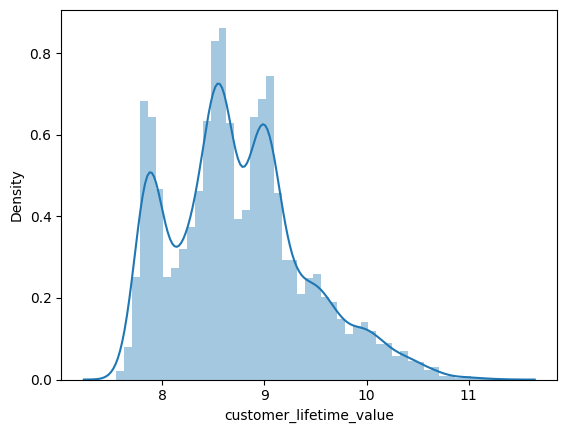

In [25]:
data1['customer_lifetime_value'] = data1['customer_lifetime_value'].apply(log_lmbda)

data1['customer_lifetime_value'] = data1['customer_lifetime_value'].fillna(np.mean(data1['customer_lifetime_value']))

sns.distplot(data1['customer_lifetime_value'])
plt.show()

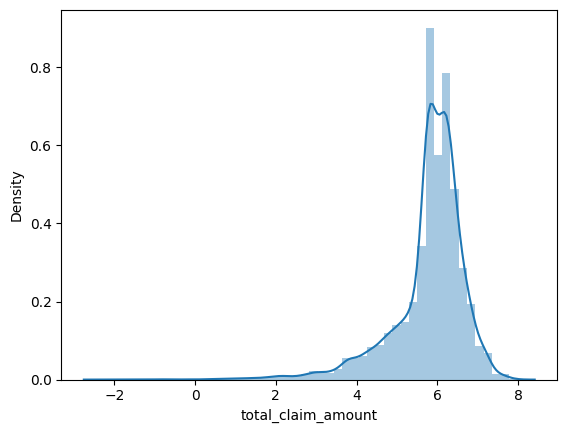

In [26]:
data1['total_claim_amount'] = data1['total_claim_amount'].apply(log_lmbda)

data1['total_claim_amount'] = data1['total_claim_amount'].fillna(np.mean(data1['total_claim_amount']))

sns.distplot(data1['total_claim_amount'])
plt.show()

In [27]:
data1

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,7.924260,No,Basic,Bachelor,2/24/11,Employed,F,10.937988,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,5.952753,Two-Door Car,Medsize
1,QZ44356,Arizona,8.850738,No,Extended,Bachelor,1/31/11,Unemployed,F,NaN,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,7.031268,Four-Door Car,Medsize
2,AI49188,Nevada,9.464008,No,Premium,Bachelor,2/19/11,Employed,F,10.794809,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,6.339428,Two-Door Car,Medsize
3,WW63253,California,8.941920,No,Basic,Bachelor,1/20/11,Unemployed,M,NaN,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,6.272653,SUV,Medsize
4,HB64268,Washington,7.942253,No,Basic,Bachelor,2/3/11,Employed,M,10.688211,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,4.928202,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,10.060747,No,Basic,Bachelor,2/10/11,Employed,M,11.183602,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,5.289452,Four-Door Car,Medsize
9130,PK87824,California,8.038031,Yes,Extended,College,2/12/11,Employed,F,9.980634,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,5.938064,Four-Door Car,Medsize
9131,TD14365,California,9.007476,No,Extended,Bachelor,2/6/11,Unemployed,M,NaN,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,6.673026,Four-Door Car,Medsize
9132,UP19263,California,8.925912,No,Extended,College,2/3/11,Employed,M,9.996112,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,6.538429,Four-Door Car,Large


In [28]:
def boxcox_transform(data1):
    numeric_cols = data1.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        # since i know any columns should take negative numbers, to avoid -inf in df
        data1[column] = np.where(data1[column]<=0, np.NAN, data1[column]) 
        data1[column] = data1[column].fillna(data1[column].mean())
        transformed_data, ci = stats.boxcox(data1[column])
        data1[column] = transformed_data
        _ci[column] = [ci] 
    return data1, _ci

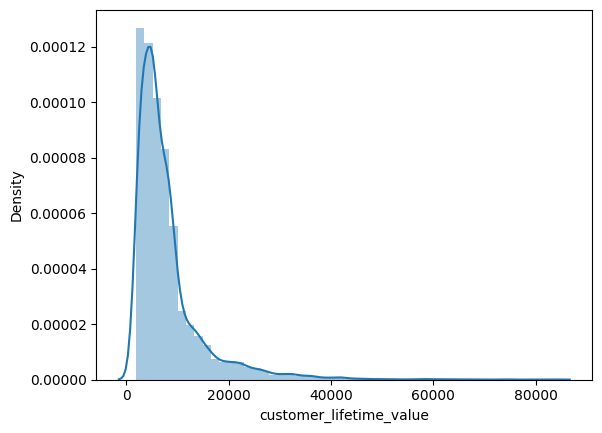

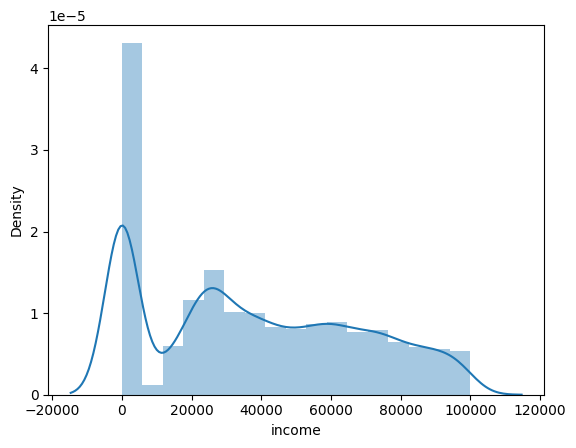

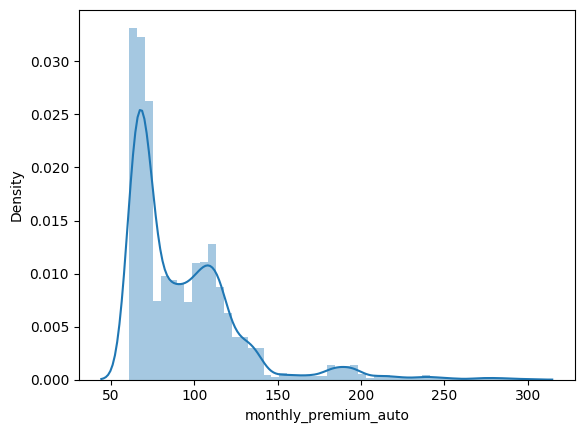

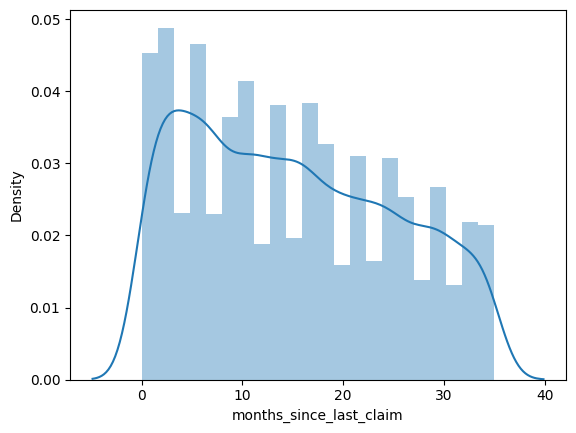

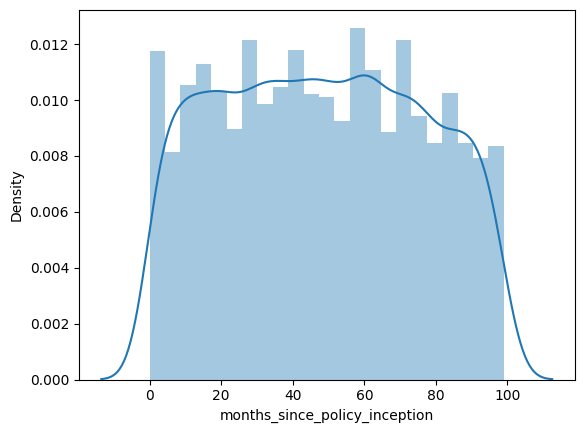

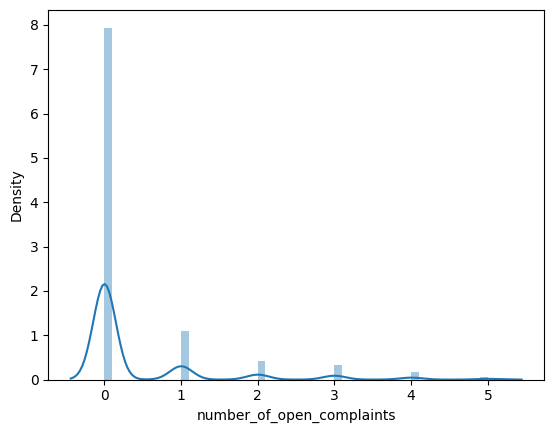

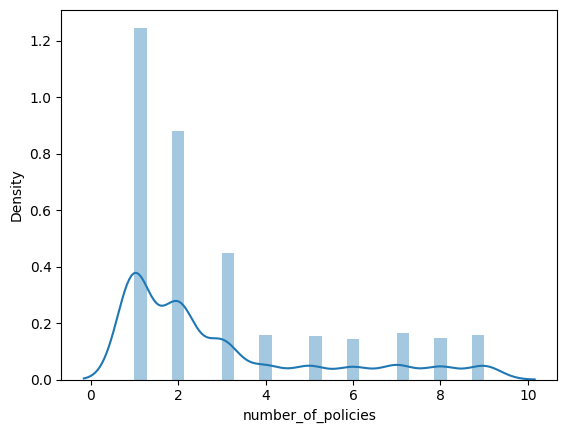

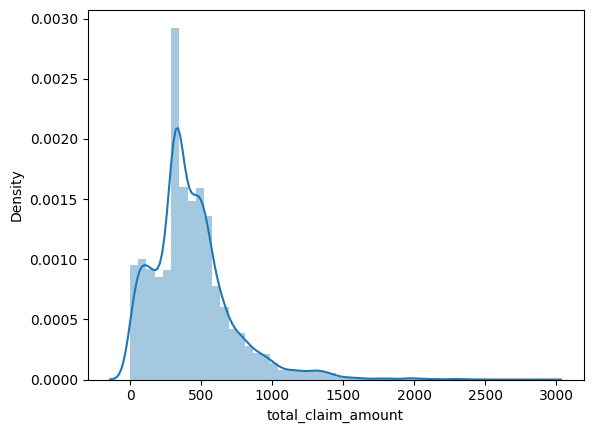

In [29]:
#EDA after scalings
for i in data1.select_dtypes('number').columns:
    sns.distplot(data[i])
    plt.show()

In [30]:
data1, _ci = boxcox_transform(data1) 
data1

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,0.458581,No,Basic,Bachelor,2/24/11,Employed,F,63455.807937,...,3.017887,0.648045,0.000000,Corporate Auto,Corporate L3,Offer1,Agent,114.897237,Two-Door Car,Medsize
1,QZ44356,Arizona,0.459717,No,Extended,Bachelor,1/31/11,Unemployed,F,56284.207398,...,18.780377,0.648045,1.424359,Personal Auto,Personal L3,Offer3,Agent,200.475472,Four-Door Car,Medsize
2,AI49188,Nevada,0.460284,No,Premium,Bachelor,2/19/11,Employed,F,59158.934850,...,17.389171,0.648045,0.607328,Personal Auto,Personal L3,Offer1,Agent,141.812100,Two-Door Car,Medsize
3,WW63253,California,0.459809,No,Basic,Bachelor,1/20/11,Unemployed,M,56284.207398,...,26.160800,0.648045,1.363462,Corporate Auto,Corporate L2,Offer1,Call Center,136.879107,SUV,Medsize
4,HB64268,Washington,0.458608,No,Basic,Bachelor,2/3/11,Employed,M,56115.870274,...,19.461641,0.648045,0.000000,Personal Auto,Personal L1,Offer1,Agent,61.043203,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,0.460735,No,Basic,Bachelor,2/10/11,Employed,M,71415.321138,...,33.090025,0.648045,0.607328,Personal Auto,Personal L1,Offer2,Web,77.372142,Four-Door Car,Medsize
9130,PK87824,California,0.458743,Yes,Extended,College,2/12/11,Employed,F,38975.633883,...,13.709541,0.648045,0.000000,Corporate Auto,Corporate L3,Offer1,Branch,113.951590,Four-Door Car,Medsize
9131,TD14365,California,0.459874,No,Extended,Bachelor,2/6/11,Unemployed,M,56284.207398,...,17.034934,1.176115,0.607328,Corporate Auto,Corporate L2,Offer1,Branch,168.332005,Four-Door Car,Medsize
9132,UP19263,California,0.459793,No,Extended,College,2/3/11,Employed,M,39298.364276,...,1.667871,0.648045,0.893486,Personal Auto,Personal L2,Offer3,Branch,157.248982,Four-Door Car,Large


In [31]:
#removing outliers
def remove_outliers(data1, threshold=1.5, in_columns=data1.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(data1[column],75)
            lower = np.percentile(data1[column],25)
            iqr = upper - lower
            upper_limit = upper + threshold * iqr
            lower_limit = lower - threshold * iqr
            data1 = data1[(data1[column]>lower_limit) & (data1[column]<upper_limit)]
    return data1

In [32]:
data2 = data1.copy()

data2
data2 = remove_outliers(data1, threshold=1.5, skip_columns=['number_of_open_complaints']) 
data2

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,0.458581,No,Basic,Bachelor,2/24/11,Employed,F,63455.807937,...,3.017887,0.648045,0.000000,Corporate Auto,Corporate L3,Offer1,Agent,114.897237,Two-Door Car,Medsize
1,QZ44356,Arizona,0.459717,No,Extended,Bachelor,1/31/11,Unemployed,F,56284.207398,...,18.780377,0.648045,1.424359,Personal Auto,Personal L3,Offer3,Agent,200.475472,Four-Door Car,Medsize
2,AI49188,Nevada,0.460284,No,Premium,Bachelor,2/19/11,Employed,F,59158.934850,...,17.389171,0.648045,0.607328,Personal Auto,Personal L3,Offer1,Agent,141.812100,Two-Door Car,Medsize
3,WW63253,California,0.459809,No,Basic,Bachelor,1/20/11,Unemployed,M,56284.207398,...,26.160800,0.648045,1.363462,Corporate Auto,Corporate L2,Offer1,Call Center,136.879107,SUV,Medsize
4,HB64268,Washington,0.458608,No,Basic,Bachelor,2/3/11,Employed,M,56115.870274,...,19.461641,0.648045,0.000000,Personal Auto,Personal L1,Offer1,Agent,61.043203,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,0.460735,No,Basic,Bachelor,2/10/11,Employed,M,71415.321138,...,33.090025,0.648045,0.607328,Personal Auto,Personal L1,Offer2,Web,77.372142,Four-Door Car,Medsize
9130,PK87824,California,0.458743,Yes,Extended,College,2/12/11,Employed,F,38975.633883,...,13.709541,0.648045,0.000000,Corporate Auto,Corporate L3,Offer1,Branch,113.951590,Four-Door Car,Medsize
9131,TD14365,California,0.459874,No,Extended,Bachelor,2/6/11,Unemployed,M,56284.207398,...,17.034934,1.176115,0.607328,Corporate Auto,Corporate L2,Offer1,Branch,168.332005,Four-Door Car,Medsize
9132,UP19263,California,0.459793,No,Extended,College,2/3/11,Employed,M,39298.364276,...,1.667871,0.648045,0.893486,Personal Auto,Personal L2,Offer3,Branch,157.248982,Four-Door Car,Large


In [33]:
data3 = remove_outliers(data2, threshold=1.5, in_columns=['total_claim_amount', 'monthly_premium_auto']).drop("customer", axis = 1)

data3

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,0.458581,No,Basic,Bachelor,2/24/11,Employed,F,63455.807937,Suburban,...,3.017887,0.648045,0.000000,Corporate Auto,Corporate L3,Offer1,Agent,114.897237,Two-Door Car,Medsize
2,Nevada,0.460284,No,Premium,Bachelor,2/19/11,Employed,F,59158.934850,Suburban,...,17.389171,0.648045,0.607328,Personal Auto,Personal L3,Offer1,Agent,141.812100,Two-Door Car,Medsize
3,California,0.459809,No,Basic,Bachelor,1/20/11,Unemployed,M,56284.207398,Suburban,...,26.160800,0.648045,1.363462,Corporate Auto,Corporate L2,Offer1,Call Center,136.879107,SUV,Medsize
4,Washington,0.458608,No,Basic,Bachelor,2/3/11,Employed,M,56115.870274,Rural,...,19.461641,0.648045,0.000000,Personal Auto,Personal L1,Offer1,Agent,61.043203,Four-Door Car,Medsize
5,Oregon,0.459885,Yes,Basic,Bachelor,1/25/11,Employed,F,66969.623745,Rural,...,34.462027,0.648045,0.607328,Personal Auto,Personal L3,Offer2,Web,67.190481,Two-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,0.460735,No,Basic,Bachelor,2/10/11,Employed,M,71415.321138,Urban,...,33.090025,0.648045,0.607328,Personal Auto,Personal L1,Offer2,Web,77.372142,Four-Door Car,Medsize
9130,California,0.458743,Yes,Extended,College,2/12/11,Employed,F,38975.633883,Suburban,...,13.709541,0.648045,0.000000,Corporate Auto,Corporate L3,Offer1,Branch,113.951590,Four-Door Car,Medsize
9131,California,0.459874,No,Extended,Bachelor,2/6/11,Unemployed,M,56284.207398,Suburban,...,17.034934,1.176115,0.607328,Corporate Auto,Corporate L2,Offer1,Branch,168.332005,Four-Door Car,Medsize
9132,California,0.459793,No,Extended,College,2/3/11,Employed,M,39298.364276,Suburban,...,1.667871,0.648045,0.893486,Personal Auto,Personal L2,Offer3,Branch,157.248982,Four-Door Car,Large


In [34]:
#dummifying data
data = pd.get_dummies(data3, drop_first=True) 
data

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,state_California,state_Nevada,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,0.458581,63455.807937,0.685347,10.876059,3.017887,0.648045,0.000000,114.897237,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0.460284,59158.934850,0.686039,7.347815,17.389171,0.648045,0.607328,141.812100,0,1,...,0,0,0,0,0,0,0,1,1,0
3,0.459809,56284.207398,0.686018,7.347815,26.160800,0.648045,1.363462,136.879107,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0.458608,56115.870274,0.685461,5.471294,19.461641,0.648045,0.000000,61.043203,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0.459885,66969.623745,0.685347,6.134207,34.462027,0.648045,0.607328,67.190481,0,0,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0.460735,71415.321138,0.685461,7.347815,33.090025,0.648045,0.607328,77.372142,1,0,...,0,0,1,0,0,0,0,0,1,0
9130,0.458743,38975.633883,0.685606,6.134207,13.709541,0.648045,0.000000,113.951590,1,0,...,1,0,0,0,0,0,0,0,1,0
9131,0.459874,56284.207398,0.685725,4.379465,17.034934,1.176115,0.607328,168.332005,1,0,...,1,0,0,0,0,0,0,0,1,0
9132,0.459793,39298.364276,0.685898,11.319628,1.667871,0.648045,0.893486,157.248982,1,0,...,1,0,0,0,0,0,0,0,0,0


In [35]:
data.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'total_claim_amount',
       'state_California', 'state_Nevada',
       ...
       'sales_channel_Branch', 'sales_channel_Call Center',
       'sales_channel_Web', 'vehicle_class_Luxury Car',
       'vehicle_class_Luxury SUV', 'vehicle_class_SUV',
       'vehicle_class_Sports Car', 'vehicle_class_Two-Door Car',
       'vehicle_size_Medsize', 'vehicle_size_Small'],
      dtype='object', length=109)

In [36]:
X = data.drop('total_claim_amount', axis=1)
y = data['total_claim_amount']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
# using standard scaler
transformer = StandardScaler() 

transformer.fit(X_train)

x_standardized = transformer.transform(X_train)
x_standardized#.shape
#pd.DataFrame(x_standardized)

x_test_standardized = transformer.transform(X_test)


In [38]:
# start the model
model = LinearRegression()
# train the model
model.fit(x_standardized, y_train)

LinearRegression()

# Predicting after scaling & transformations

In [39]:
predictions = model.predict(x_test_standardized)

In [40]:
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.8131667883652538, 11.517960265424554, 14.527071183955838)

Get a stronger prediction R2 after scaling, transformations & dummifying caetgoricals

In [46]:
from scipy.special import inv_boxcox

predictions = inv_boxcox(predictions, _ci['total_claim_amount'])
#predictions = x_test_standardized.inverse_transform(predictions)

In [54]:
mae = mean_absolute_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
print("RMSE:", rmse)
print("MAE:", mae)

RMSE: 116.04658488345324
MAE: 111.21209392141182


Lower RMSE & MAE after scaling, transformations & dummifying caetgoricals

In [48]:
import math

results = pd.DataFrame()
results['true'] = inv_boxcox(y_test, _ci['total_claim_amount'])
results['pred'] = predictions
results['resid'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results

,true,pred,resid
1188,6.151650,6.049101,0.102549
7411,4.722291,4.527330,0.194961
3050,6.339301,6.371569,0.032269
6920,5.533614,5.858755,0.325141
36,6.330790,6.398587,0.067797
...,...,...,...
2689,6.287115,6.425237,0.138122
8261,6.278146,6.212793,0.065353
1388,5.758271,5.774117,0.015847
1376,5.679490,6.050407,0.370917


In [49]:
results.sort_values('resid', ascending=False).head(50)

,true,pred,resid
7147,5.794798,4.305248,1.489550
5437,4.496608,5.690342,1.193734
284,4.300011,5.470313,1.170302
2456,4.321516,5.443062,1.121546
2334,5.794798,4.681574,1.113224
761,4.407227,5.394351,0.987124
5247,4.459883,5.408889,0.949006
2463,4.273513,5.203571,0.930058
2237,4.952019,5.851739,0.899720
8251,4.409293,5.267652,0.858360


In [50]:
results[results['true'] >= 4]

,true,pred,resid
1188,6.151650,6.049101,0.102549
7411,4.722291,4.527330,0.194961
3050,6.339301,6.371569,0.032269
6920,5.533614,5.858755,0.325141
36,6.330790,6.398587,0.067797
...,...,...,...
2689,6.287115,6.425237,0.138122
8261,6.278146,6.212793,0.065353
1388,5.758271,5.774117,0.015847
1376,5.679490,6.050407,0.370917


In [51]:
results.describe()

,true,pred,resid
count,2469.000000,2469.000000,2469.000000
mean,5.928708,5.930960,0.186789
std,0.557170,0.527758,0.154285
min,4.266940,4.188711,0.000312
25%,5.711751,5.788485,0.082670
50%,5.987457,6.034093,0.147204
75%,6.296004,6.295661,0.256159
max,7.009331,6.962585,1.489550


In [53]:
data['monthly_premium_auto'].corr(data['total_claim_amount'])

0.4822788237318946